In [64]:
%matplotlib notebook

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, butter, buttord

In [66]:
s, fs = sf.read('xzalez01.wav')
s.min(), s.max()
s = s[:70000]
t = np.arange(s.size) / fs
print("Vzorkovacia frekvencia: ",fs, "Hz")
print("Pocet vzorkov: ", s.size,"vzorkov")
print("Dlzka signalu: ", s.size/fs, "sekund")
print("Minimalna hodnota: ", s.min())
print("Maximalna hodnota: ", s.max())

Vzorkovacia frekvencia:  16000 Hz
Pocet vzorkov:  33178 vzorkov
Dlzka signalu:  2.073625 sekund
Minimalna hodnota:  -0.096466064453125
Maximalna hodnota:  0.14453125


<IPython.core.display.Javascript object>


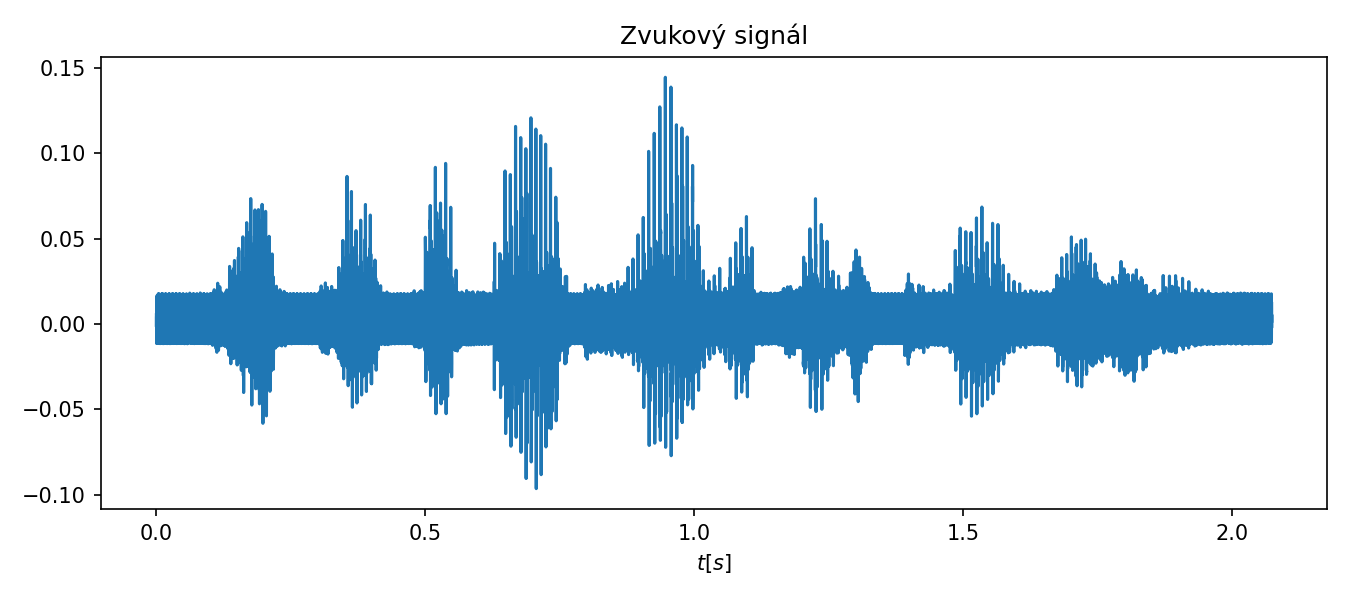

In [67]:
plt.figure(figsize=(9,4))
plt.plot(t, s)

plt.gca().set_xlabel('$t[s]$')
plt.gca().set_title('Zvukový signál')

plt.tight_layout()

In [69]:
IPython.display.display(IPython.display.Audio(s, rate=fs))

<IPython.core.display.Javascript object>


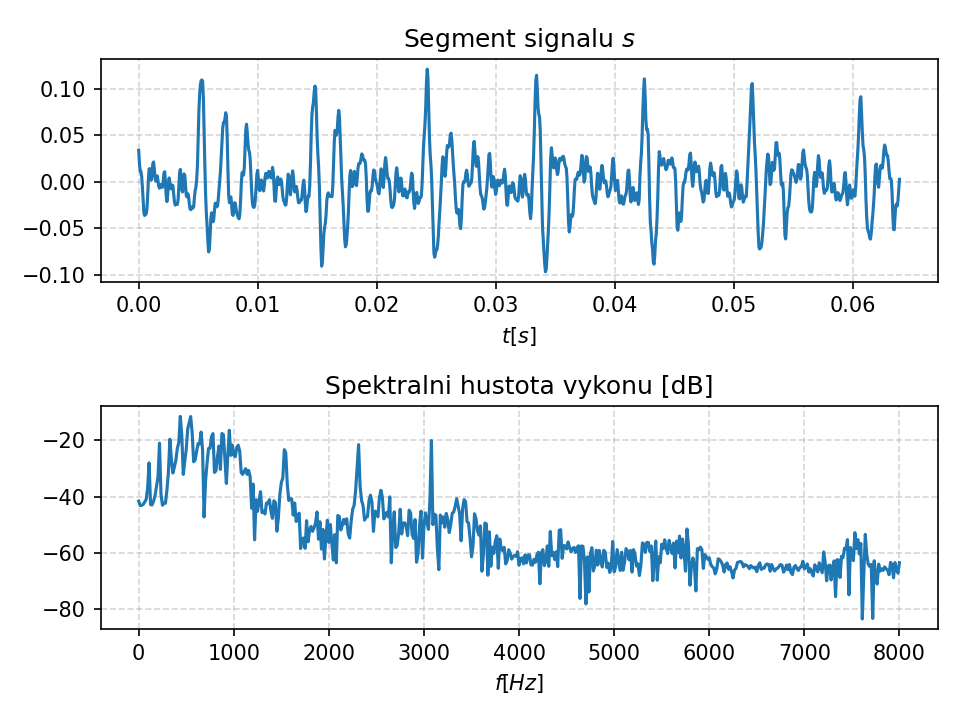

In [70]:
ramec = int(2/0.03)
matrix = []

odkud = 0     # začátek segmentu v sekundách
kolik = 0.064  # délka segmentu v sekundách
for x in range(ramec):
    
    matrix.append(odkud)
    odkud = odkud + 0.032
    #print(matrix)
    
new_odkud = matrix[21]    

odkud_vzorky = int(new_odkud * fs)         # začátek segmentu ve vzorcích
pokud_vzorky = int((new_odkud+kolik) * fs) # konec segmentu ve vzorcích

s_seg = s[odkud_vzorky:pokud_vzorky]

N = s_seg.size


s_seg_spec = np.fft.fft(s_seg)
G = 10 * np.log10(1/N * np.abs(s_seg_spec)**2)
_, ax = plt.subplots(2,1)

# np.arange(n) vytváří pole 0..n-1 podobně jako obyč Pythonovský range
ax[0].plot(np.arange(s_seg.size) / fs, s_seg)
ax[0].set_xlabel('$t[s]$')
ax[0].set_title('Segment signalu $s$')
ax[0].grid(alpha=0.5, linestyle='--')

f = np.arange(G.size) / N * fs

# zobrazujeme prvni pulku spektra
ax[1].plot(f[:f.size//2+1], G[:G.size//2+1])
ax[1].set_xlabel('$f[Hz]$')
ax[1].set_title('Spektralni hustota vykonu [dB]')
ax[1].grid(alpha=0.5, linestyle='--')

plt.tight_layout()

In [72]:
def DFT(m):
    N = len(m)
    n = np.arange(N)
    k = n.reshape((N,1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, m)

    return X



<IPython.core.display.Javascript object>


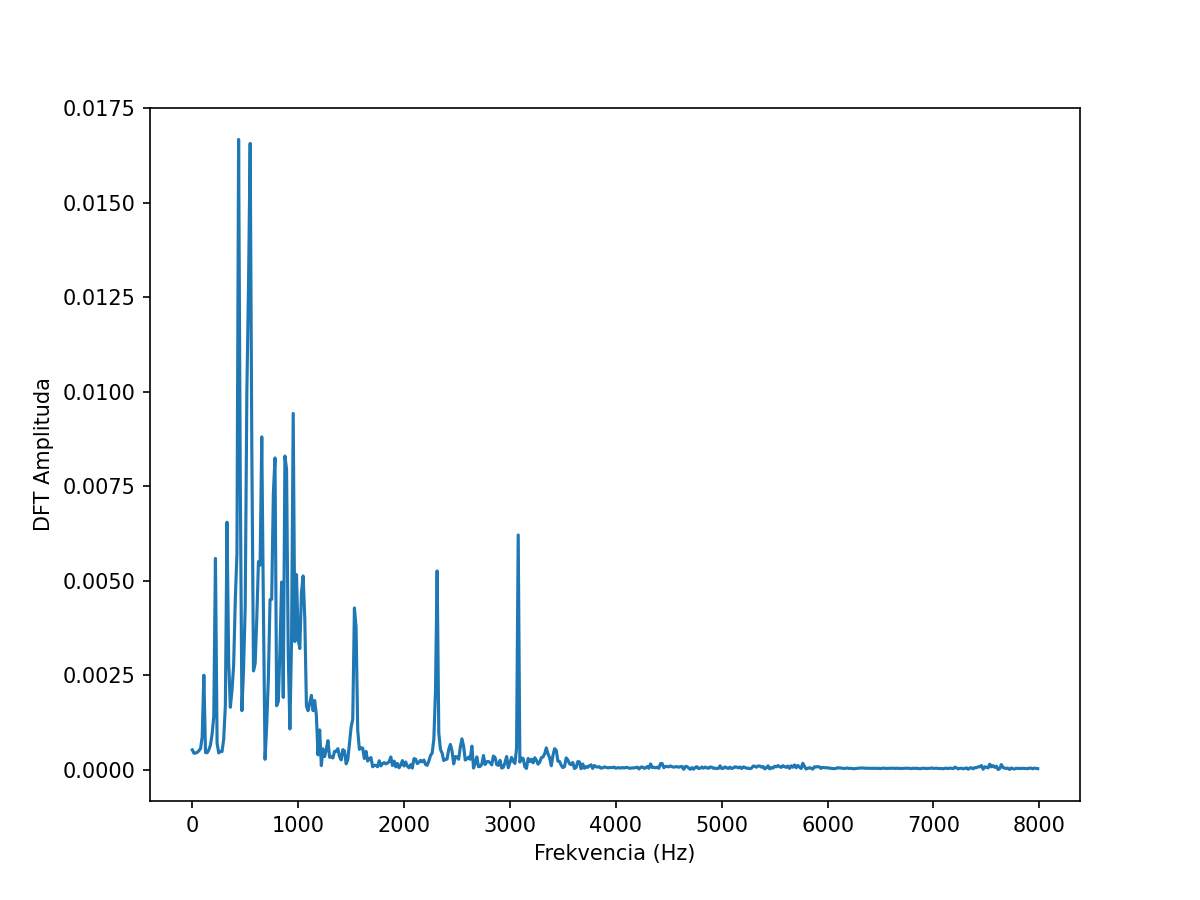

In [73]:
X = DFT(s_seg)
# calculate the frequency
m = len(X)
n = np.arange(m)
T = 1024/fs
freq = n/T 

n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (8, 6))
plt.plot(f_oneside,abs(X_oneside))
plt.xlabel('Frekvencia (Hz)')
plt.ylabel('DFT Amplituda')
plt.show()


In [75]:
f, t, sgr = spectrogram(s, fs, nperseg=1024, noverlap=512)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr+1e-20) 

<IPython.core.display.Javascript object>


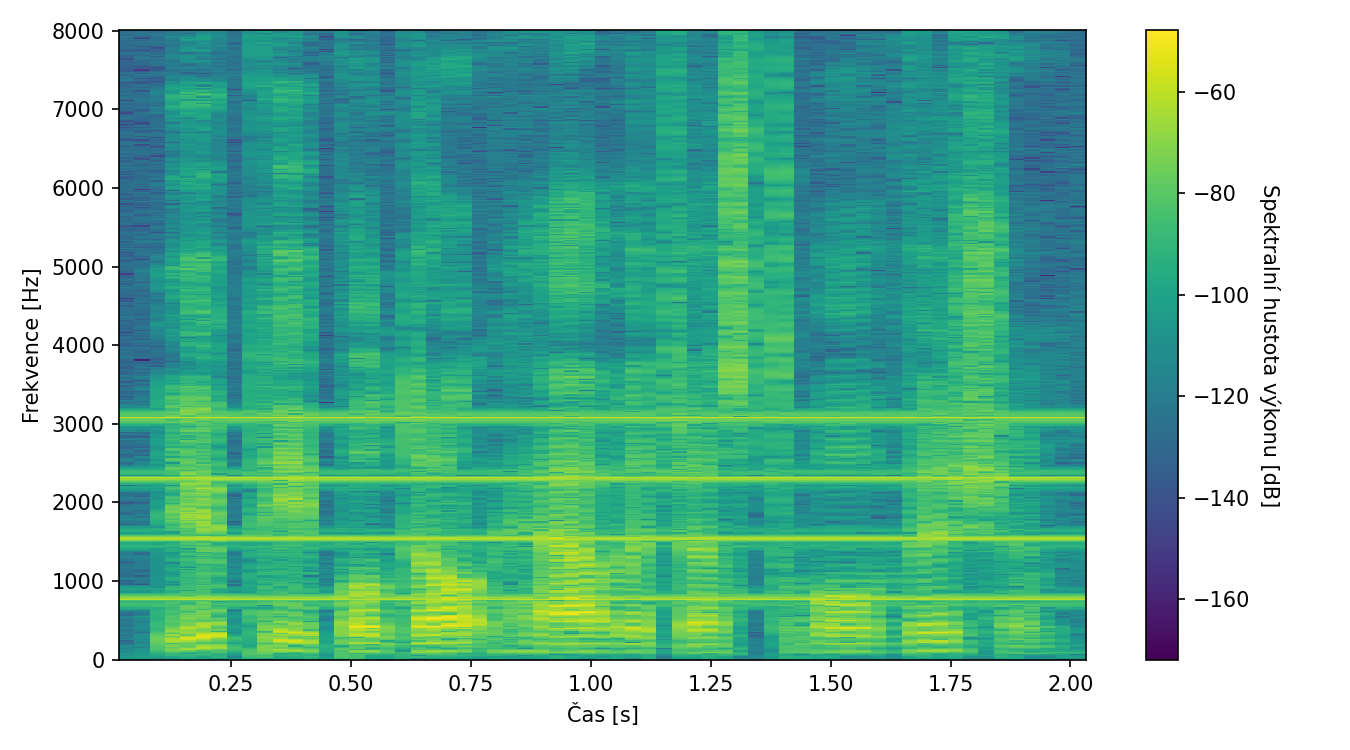

In [76]:
plt.figure(figsize=(9,5))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [77]:
for i,f in enumerate(abs(X_oneside)):
    if f > 0.0005 and f < 0.0075: 
        print('frekvencia  {} Hz s indexom {} '.format(np.round(f_oneside[i],2), i))
    

frekvencia  0.0 Hz s indexom 0 
frekvencia  62.5 Hz s indexom 4 
frekvencia  78.12 Hz s indexom 5 
frekvencia  93.75 Hz s indexom 6 
frekvencia  109.38 Hz s indexom 7 
frekvencia  156.25 Hz s indexom 10 
frekvencia  171.88 Hz s indexom 11 
frekvencia  187.5 Hz s indexom 12 
frekvencia  203.12 Hz s indexom 13 
frekvencia  218.75 Hz s indexom 14 
frekvencia  234.38 Hz s indexom 15 
frekvencia  296.88 Hz s indexom 19 
frekvencia  312.5 Hz s indexom 20 
frekvencia  328.12 Hz s indexom 21 
frekvencia  343.75 Hz s indexom 22 
frekvencia  359.38 Hz s indexom 23 
frekvencia  375.0 Hz s indexom 24 
frekvencia  390.62 Hz s indexom 25 
frekvencia  406.25 Hz s indexom 26 
frekvencia  421.88 Hz s indexom 27 
frekvencia  468.75 Hz s indexom 30 
frekvencia  484.38 Hz s indexom 31 
frekvencia  500.0 Hz s indexom 32 
frekvencia  578.12 Hz s indexom 37 
frekvencia  593.75 Hz s indexom 38 
frekvencia  609.38 Hz s indexom 39 
frekvencia  625.0 Hz s indexom 40 
frekvencia  640.62 Hz s indexom 41 
frekvenci

In [78]:
freqs = [f_oneside[49], f_oneside[98], f_oneside[147], f_oneside[196]]
t = np.linspace(0, s.size/fs, s.size)
cos_output = 0

for i in range(len(freqs)):
    cos_output += np.cos(2 * np.pi * freqs[i] * t)

sf.write("4cos.wav", cos_output, fs)


In [79]:
IPython.display.display(IPython.display.Audio(cos_output, rate=fs))

In [80]:
f, t, sgr = spectrogram(cos_output, fs, nperseg=1024, noverlap=512)
# prevod na PSD
# (ve spektrogramu se obcas objevuji nuly, ktere se nelibi logaritmu, proto +1e-20)
sgr_log = 10 * np.log10(sgr+1e-20)

<IPython.core.display.Javascript object>


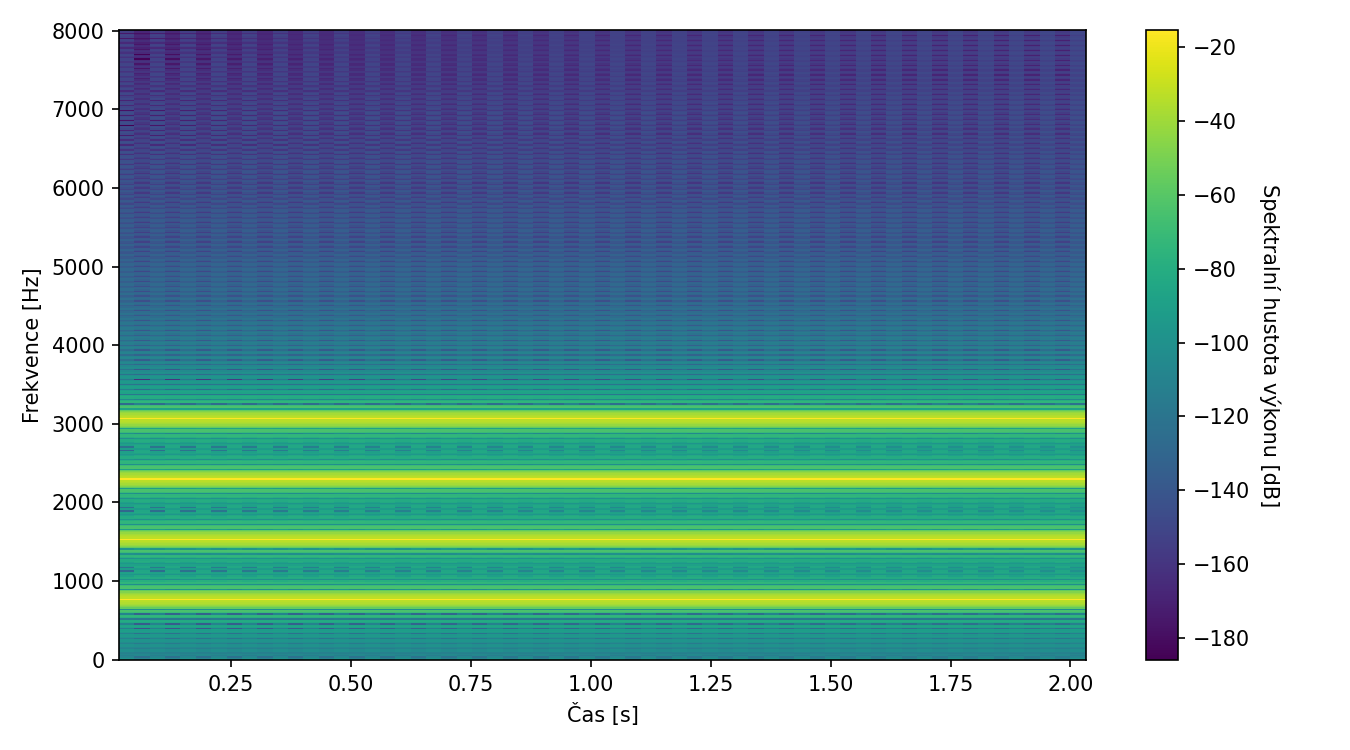

In [81]:
plt.figure(figsize=(9,5))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

<IPython.core.display.Javascript object>


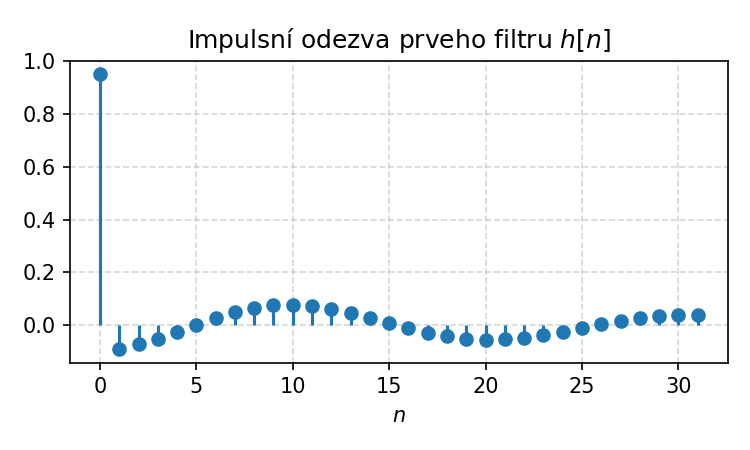

In [83]:
N1, Wn1 = buttord([f_oneside[49]-50, f_oneside[49]+50],[f_oneside[49]-15, f_oneside[49]+15], 3, 40, True)
b1, a1 = butter(N1, Wn1, 'bandstop', output= 'ba', fs = 16000)


imp = [1, *np.zeros(31)]
h = lfilter(b1, a1, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(32), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva prveho filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


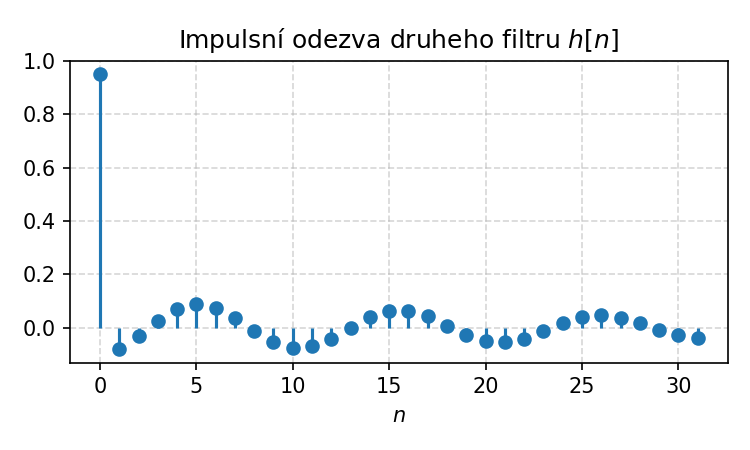

In [84]:
N2, Wn2 = buttord([f_oneside[98]-50, f_oneside[98]+50],[f_oneside[98]-15, f_oneside[98]+15], 3, 40, True)
b2, a2 = butter(N2, Wn2, 'bandstop', output= 'ba', fs = 16000)


imp = [1, *np.zeros(31)]
h = lfilter(b2, a2, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(32), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva druheho filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


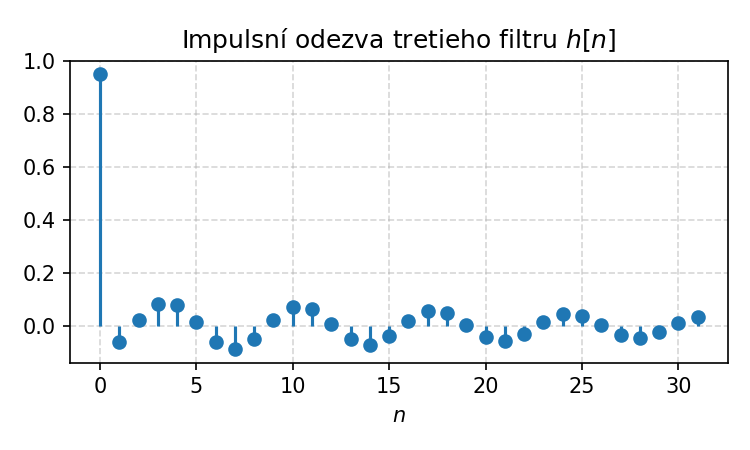

In [86]:
N3, Wn3 = buttord([f_oneside[147]-50, f_oneside[147]+50],[f_oneside[147]-15, f_oneside[147]+15], 3, 40, True)
b3, a3 = butter(N3, Wn3, 'bandstop', output= 'ba', fs = 16000)


imp = [1, *np.zeros(31)]
h = lfilter(b3, a3, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(32), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva tretieho filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


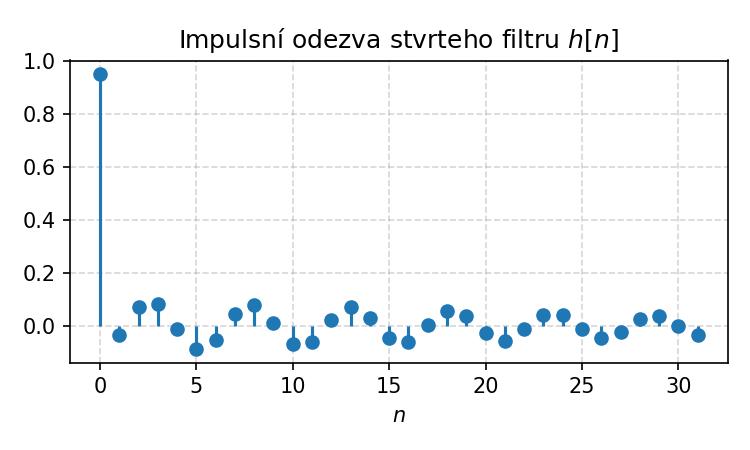

In [88]:
N4, Wn4 = buttord([f_oneside[196]-50, f_oneside[196]+50],[f_oneside[196]-15, f_oneside[196]+15], 3, 40, True)
b4, a4 = butter(N4, Wn4, 'bandstop', output= 'ba', fs = 16000)


imp = [1, *np.zeros(31)]
h = lfilter(b4, a4, imp)

plt.figure(figsize=(5,3))
plt.stem(np.arange(32), h, basefmt=' ')
plt.gca().set_xlabel('$n$')
plt.gca().set_title('Impulsní odezva stvrteho filtru $h[n]$')

plt.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


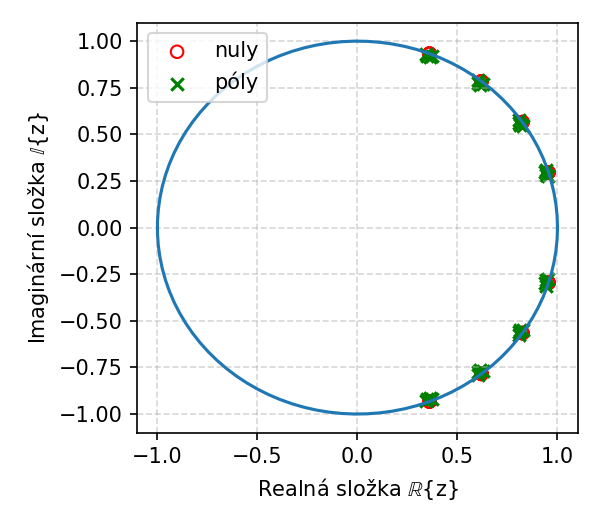

In [90]:
z1, p1, _ = tf2zpk(b1, a1)
z2, p2, _ = tf2zpk(b2, a2)
z3, p3, _ = tf2zpk(b3, a3)
z4, p4, _ = tf2zpk(b4, a4)

plt.figure(figsize=(4,3.5))

# jednotkova kruznice
ang = np.linspace(0, 2*np.pi,100)
plt.plot(np.cos(ang), np.sin(ang))

# nuly, poly
plt.scatter(np.real(z1), np.imag(z1), marker='o', facecolors='none', edgecolors='r', label='nuly')
plt.scatter(np.real(p1), np.imag(p1), marker='x', color='g', label='póly')
plt.scatter(np.real(z2), np.imag(z2), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p2), np.imag(p2), marker='x', color='g')
plt.scatter(np.real(z3), np.imag(z3), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p3), np.imag(p3), marker='x', color='g')
plt.scatter(np.real(z4), np.imag(z4), marker='o', facecolors='none', edgecolors='r')
plt.scatter(np.real(p4), np.imag(p4), marker='x', color='g')

plt.gca().set_xlabel('Realná složka $\mathbb{R}\{$z$\}$')
plt.gca().set_ylabel('Imaginární složka $\mathbb{I}\{$z$\}$')

plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper left')

plt.tight_layout()

<IPython.core.display.Javascript object>


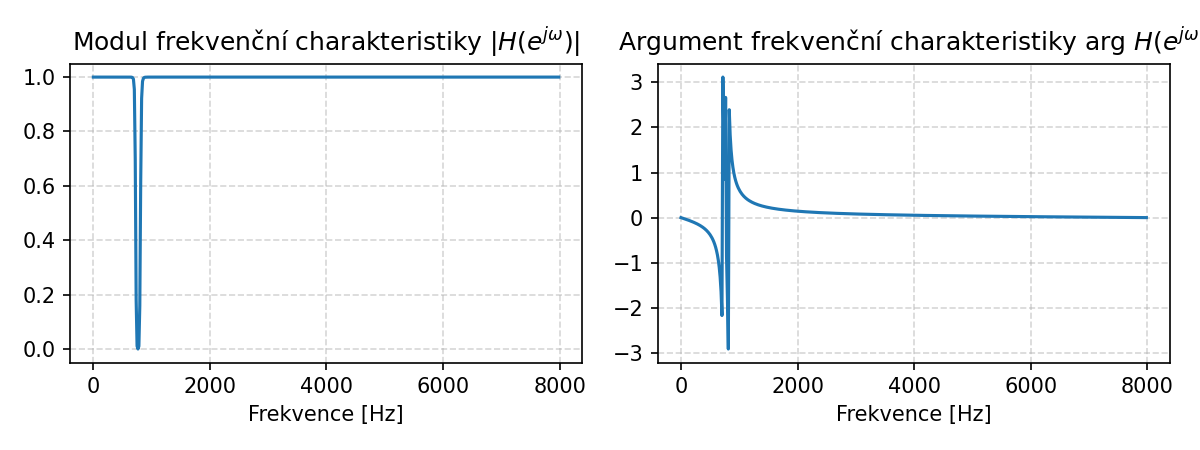

In [92]:
w, H = freqz(b1, a1)
_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


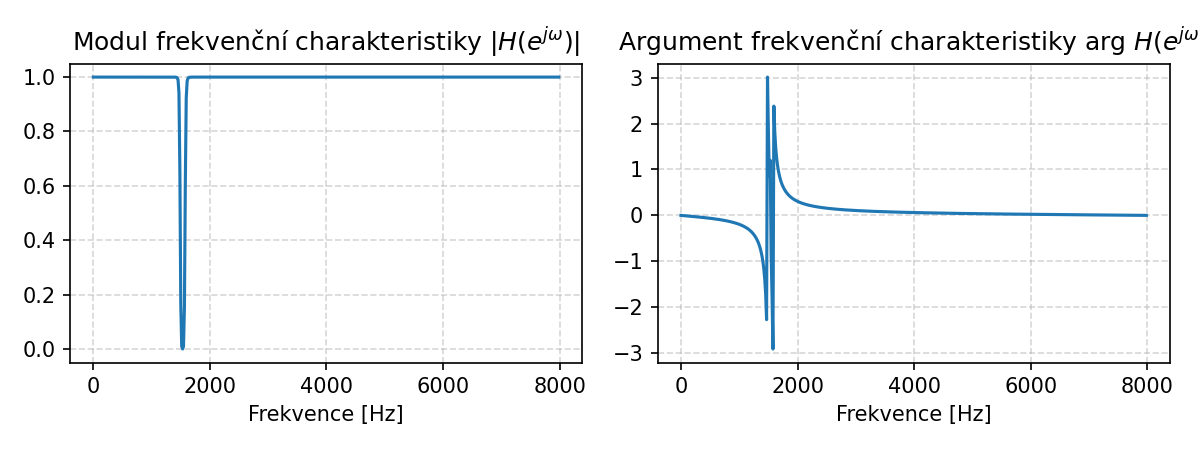

In [93]:
w, H = freqz(b2, a2)
_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


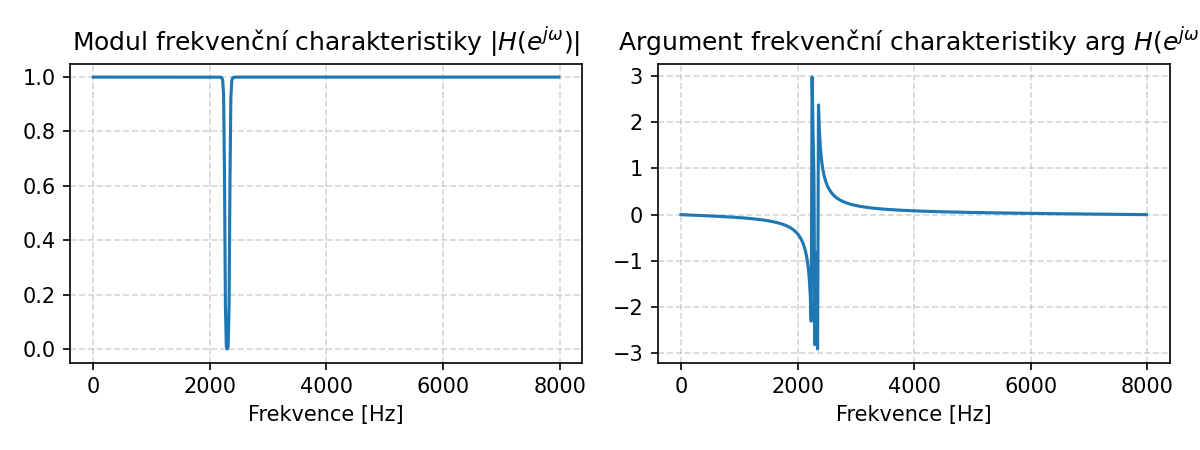

In [95]:
w, H = freqz(b3, a3)
_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


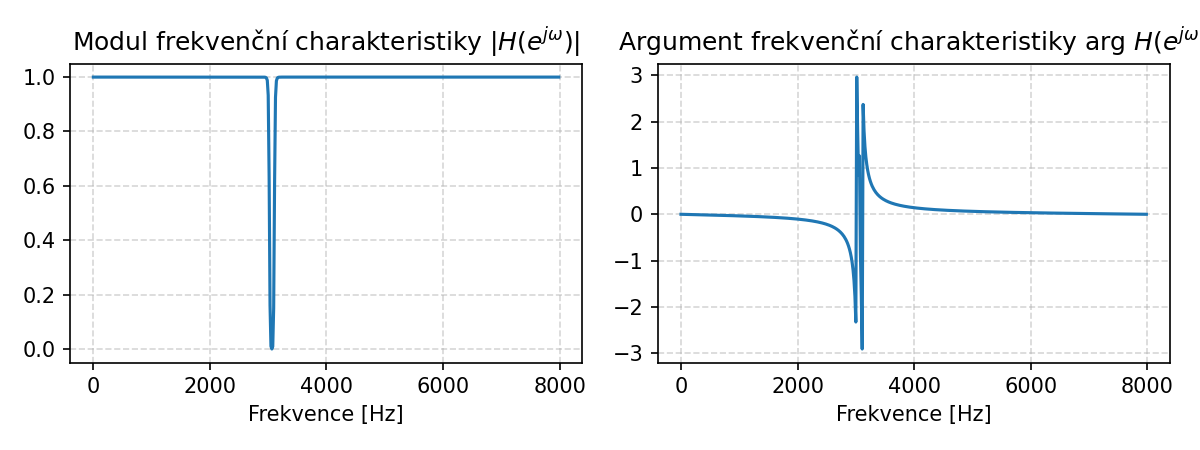

In [98]:
w, H = freqz(b4, a4)
_, ax = plt.subplots(1, 2, figsize=(8,3))

ax[0].plot(w / 2 / np.pi * fs, np.abs(H))
ax[0].set_xlabel('Frekvence [Hz]')
ax[0].set_title('Modul frekvenční charakteristiky $|H(e^{j\omega})|$')

ax[1].plot(w / 2 / np.pi * fs, np.angle(H))
ax[1].set_xlabel('Frekvence [Hz]')
ax[1].set_title('Argument frekvenční charakteristiky $\mathrm{arg}\ H(e^{j\omega})$')

for ax1 in ax:
    ax1.grid(alpha=0.5, linestyle='--')

plt.tight_layout()

In [101]:
is_stable1 = (p1.size == 0) or np.all(np.abs(p1) < 1)
is_stable2 = (p2.size == 0) or np.all(np.abs(p2) < 1)
is_stable3 = (p3.size == 0) or np.all(np.abs(p3) < 1)
is_stable4 = (p4.size == 0) or np.all(np.abs(p4) < 1)
print('Filtr1 {} stabilni.'.format('je' if is_stable1 else 'není'))
print('Filtr2 {} stabilni.'.format('je' if is_stable2 else 'není'))
print('Filtr3 {} stabilni.'.format('je' if is_stable3 else 'není'))
print('Filtr4 {} stabilni.'.format('je' if is_stable4 else 'není'))

Filtr1 je stabilni.
Filtr2 je stabilni.
Filtr3 je stabilni.
Filtr4 je stabilni.


<IPython.core.display.Javascript object>


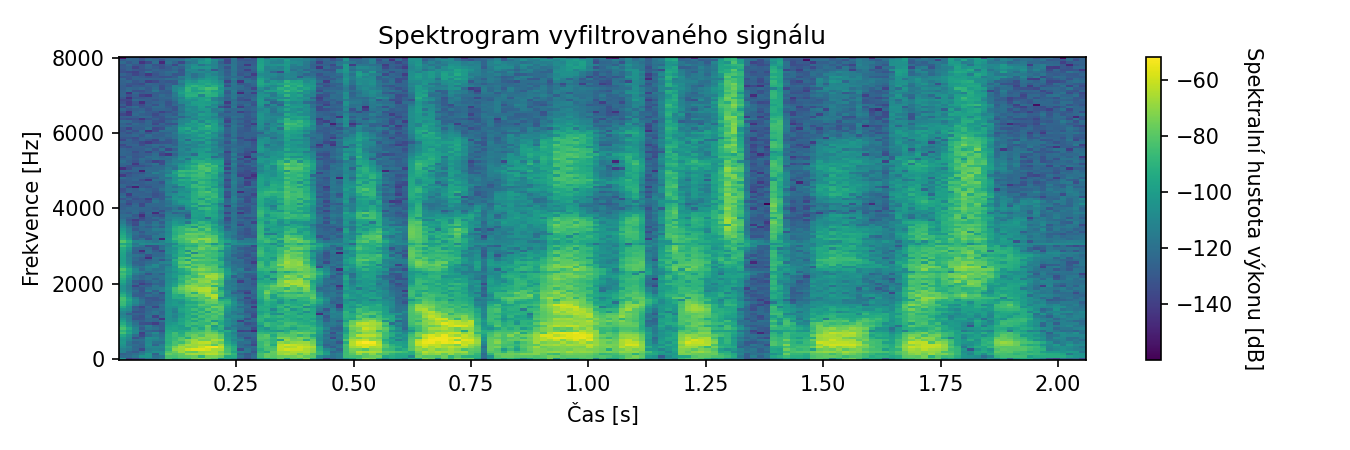

In [102]:
new_sf = lfilter(b1, a1, s)
new_sf = lfilter(b2, a2, new_sf)
new_sf = lfilter(b3, a3, new_sf)
new_sf = lfilter(b4, a4, new_sf)
f, t, sfgr = spectrogram(new_sf, fs)
sfgr_log = 10 * np.log10(sfgr+1e-20)

plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sfgr_log)
plt.gca().set_title('Spektrogram vyfiltrovaného signálu')
plt.gca().set_xlabel('Čas [s]')
plt.gca().set_ylabel('Frekvence [Hz]')
cbar = plt.colorbar()
cbar.set_label('Spektralní hustota výkonu [dB]', rotation=270, labelpad=15)

plt.tight_layout()

In [104]:
sf.write("clean_bandstop.wav", new_sf, fs)

In [105]:
IPython.display.display(IPython.display.Audio(new_sf, rate=fs))